# 추후 할 것
-----------------------------
- 피처 추가(필요시에 추가, 추가 안 해도 괜찮음)
- 이상치 제거
- 이외에 필요하다고 느껴지는 것
-----------------------------

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('./data/all_cities_month_temp_df.csv')
df = df.loc[df.loc[:, "city_num"] == 4]

In [3]:
print(df.head(100))

      year  month  Monthly Anamoly  Monthly Unc.  city_num
9606  1816      3           27.801         2.031         4
9607  1816      4           28.695         1.816         4
9608  1816      5           28.817         1.499         4
9609  1816      6           27.128         1.439         4
9610  1816      7           25.877         1.725         4
...    ...    ...              ...           ...       ...
9701  1824      2              NaN           NaN         4
9702  1824      3              NaN           NaN         4
9703  1824      4              NaN           NaN         4
9704  1824      5              NaN           NaN         4
9705  1824      6              NaN           NaN         4

[100 rows x 5 columns]


In [4]:
df.isnull().sum()

year                 0
month                0
Monthly Anamoly    121
Monthly Unc.       121
city_num             0
dtype: int64

In [5]:
df.head()

,year,month,Monthly Anamoly,Monthly Unc.,city_num
9606,1816,3,27.801,2.031,4
9607,1816,4,28.695,1.816,4
9608,1816,5,28.817,1.499,4
9609,1816,6,27.128,1.439,4
9610,1816,7,25.877,1.725,4


In [6]:
df['year-month'] = df['year'].astype(str) + '-' + df['month'].astype(str)


In [7]:
df = df.rename(columns={'year-month': 'ds',
                        'Monthly Anamoly': 'y'})

df.head()

,year,month,y,Monthly Unc.,city_num,ds
9606,1816,3,27.801,2.031,4,1816-3
9607,1816,4,28.695,1.816,4,1816-4
9608,1816,5,28.817,1.499,4,1816-5
9609,1816,6,27.128,1.439,4,1816-6
9610,1816,7,25.877,1.725,4,1816-7


In [8]:
df

,year,month,y,Monthly Unc.,city_num,ds
9606,1816,3,27.801,2.031,4,1816-3
9607,1816,4,28.695,1.816,4,1816-4
9608,1816,5,28.817,1.499,4,1816-5
9609,1816,6,27.128,1.439,4,1816-6
9610,1816,7,25.877,1.725,4,1816-7
...,...,...,...,...,...,...
12059,2020,8,28.999,0.220,4,2020-8
12060,2020,9,28.836,0.278,4,2020-9
12061,2020,10,26.535,0.207,4,2020-10
12062,2020,11,27.341,0.290,4,2020-11


In [9]:
my_model = Prophet(interval_width=0.95)


In [10]:
my_model.fit(df)


14:06:51 - cmdstanpy - INFO - Chain [1] start processing
14:06:51 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future_dates = my_model.make_future_dataframe(periods=960, freq='MS')


In [12]:
forecast = my_model.predict(future_dates)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1816-03-01,27.742637,26.450498,28.944549
1,1816-04-01,28.626079,27.450861,29.862500
2,1816-05-01,28.319666,27.167929,29.499585
3,1816-06-01,27.623926,26.355187,28.839617
4,1816-07-01,27.234396,26.026060,28.416929


In [13]:
forecast.to_csv("./data/prophet_forecast.csv", header=True, index=True)

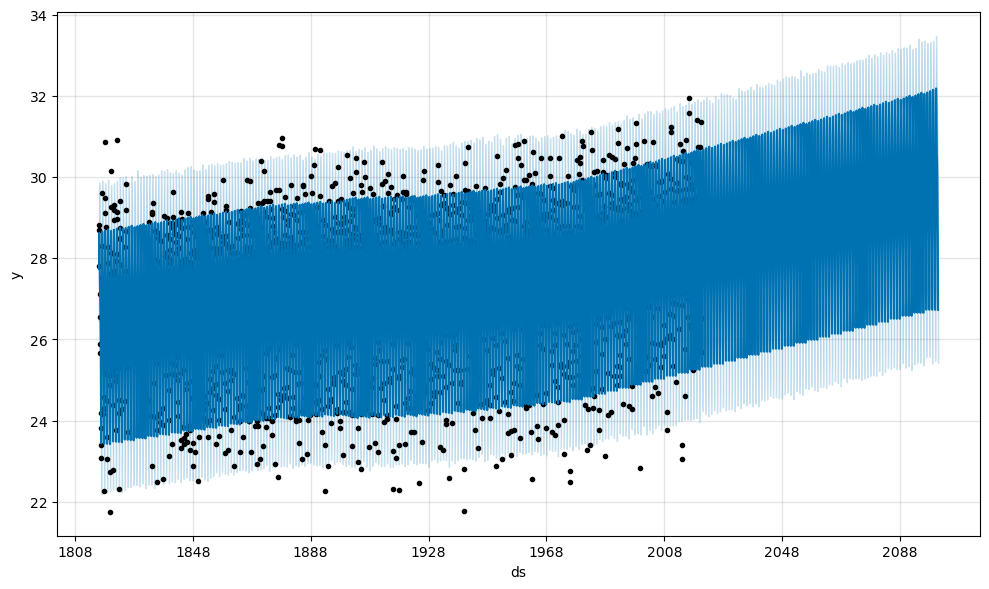

In [14]:
my_model.plot(forecast, uncertainty=True);


Text(0.5, 1.0, 'Model 1 Forecast')

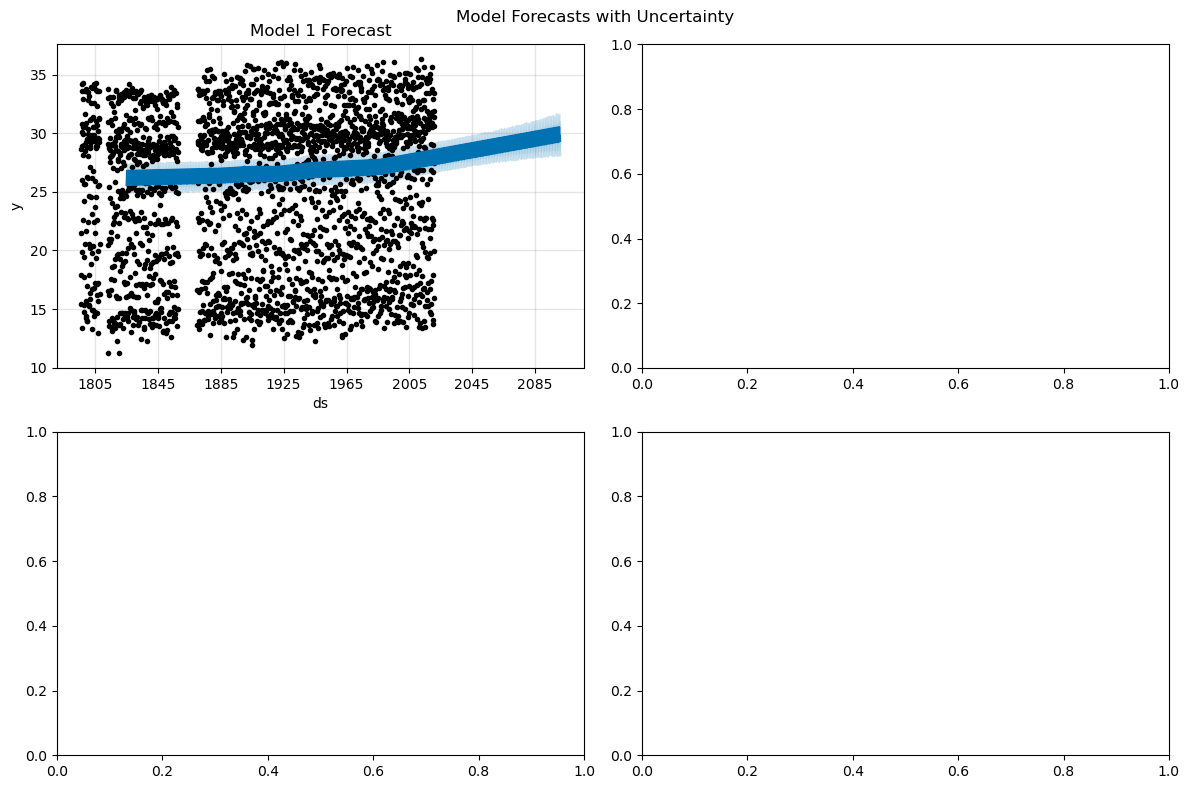

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Model Forecasts with Uncertainty')

my_model.plot(forecast, uncertainty=True, ax=axs[0, 0]);
axs[0, 0].set_title('Model 1 Forecast')



# Decomposition

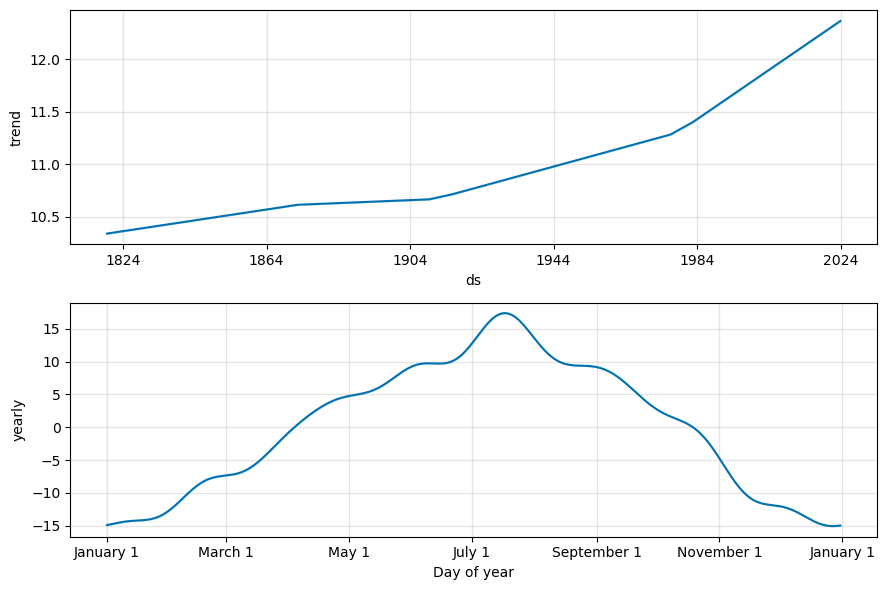

In [ ]:
my_model.plot_components(forecast);

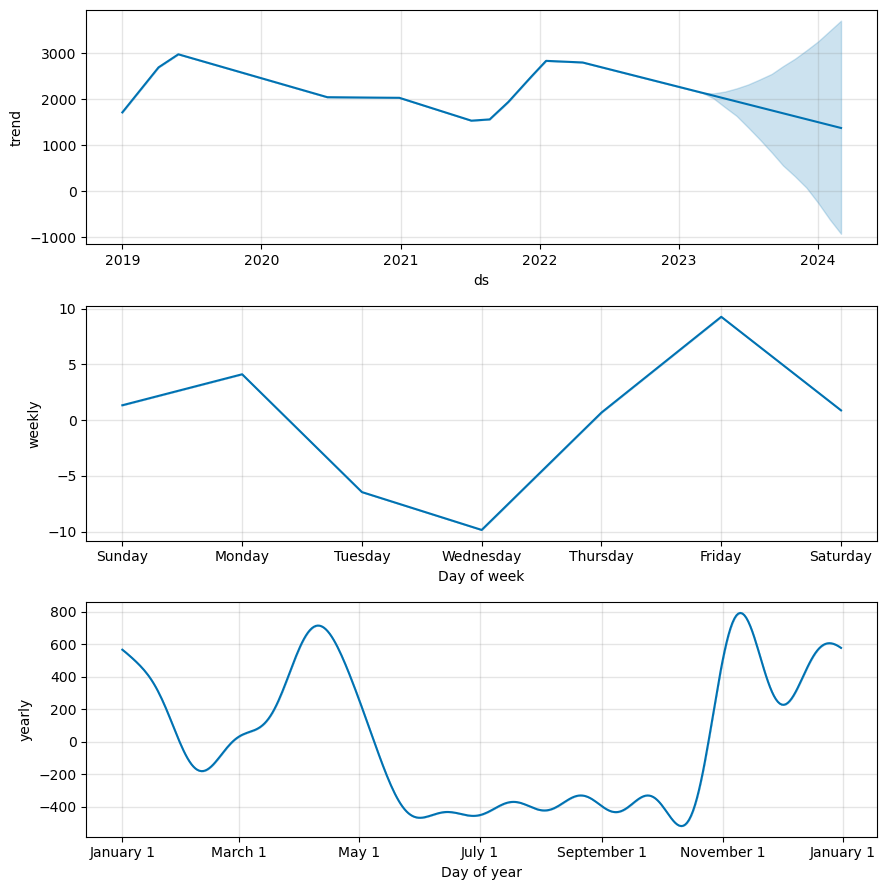

In [ ]:
my_model2.plot_components(forecast2);

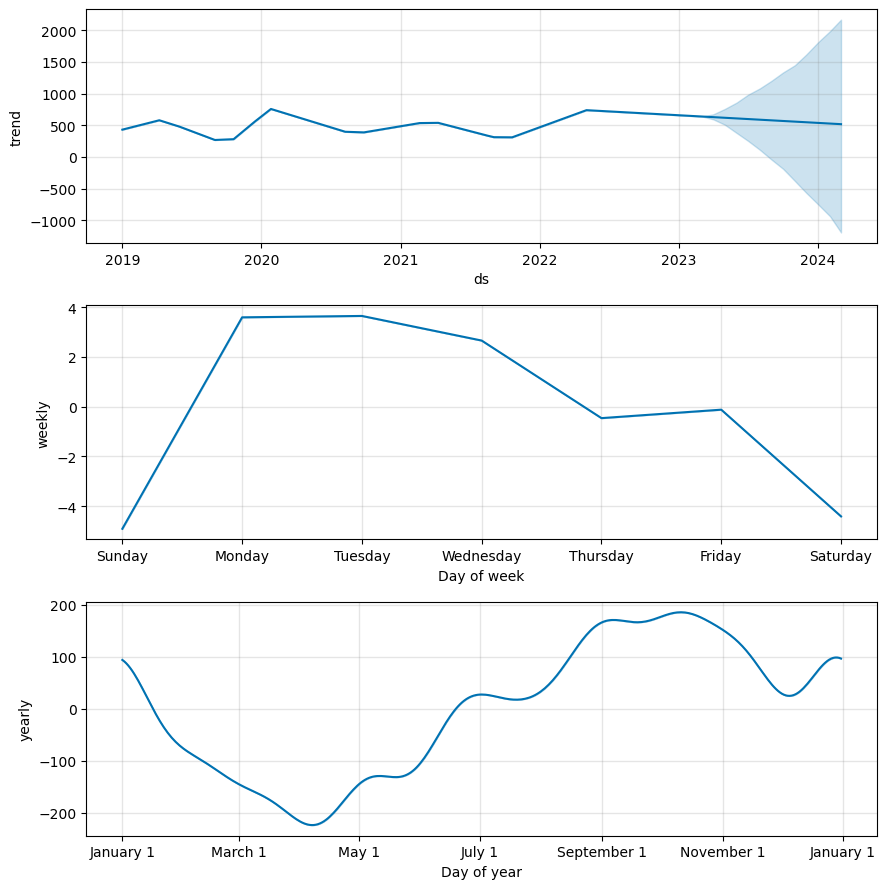

In [ ]:
my_model3.plot_components(forecast3);

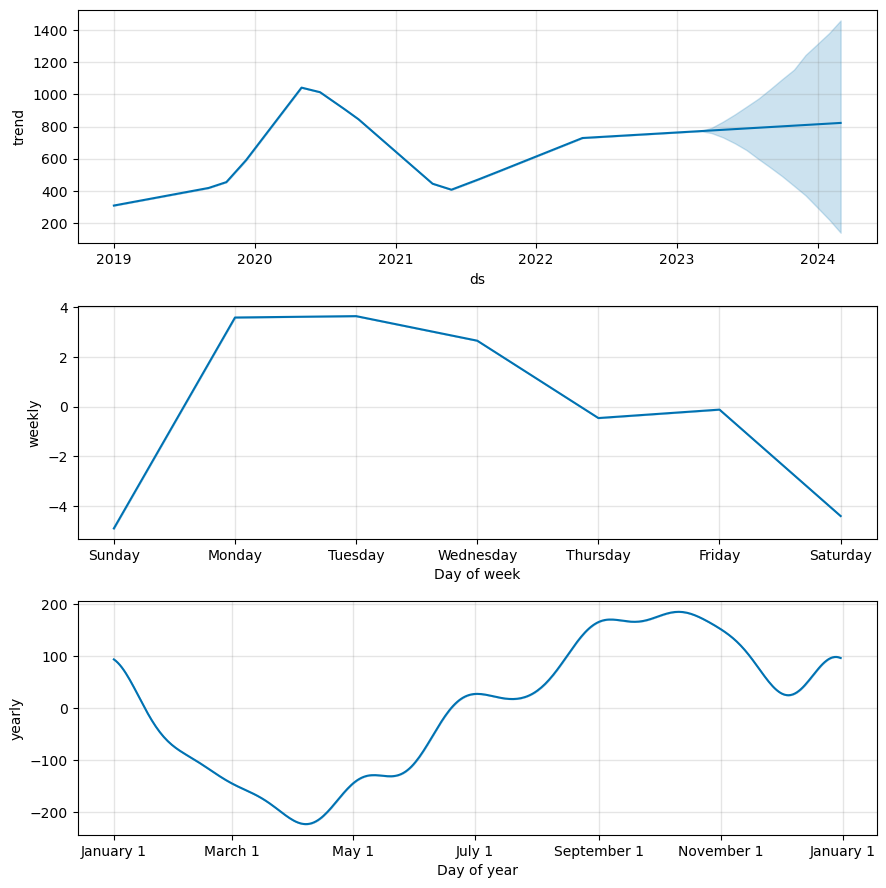

In [ ]:
my_model3.plot_components(forecast4);